In [58]:
import numpy as np
import pandas as pd
from scipy.stats.stats import pearsonr
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import RidgeCV, LassoCV, Ridge, Lasso

train = pd.read_csv('train.csv', index_col=0)
train1 = train.copy()

In [59]:
index = train1.index
columns = train1.columns
values = train1.values

train1['TotHouseSF'] = train1['1stFlrSF']+train1['2ndFlrSF']

train1.BsmtHalfBath.replace([1], [0.5], inplace=True)
train1.HalfBath.replace([1], [0.5], inplace=True)

train1['TotBath'] = train1['BsmtHalfBath']+train1['HalfBath']+train1['BsmtFullBath']+train1['FullBath']

train1['BathBroomRatio'] = train1['TotBath']//train1['BedroomAbvGr']

data = train1[['YearBuilt','YearRemodAdd','BathBroomRatio','MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2','BsmtUnfSF','1stFlrSF','2ndFlrSF','TotHouseSF','TotalBsmtSF','TotBath','LowQualFinSF','GrLivArea','BsmtHalfBath','FullBath','HalfBath','BedroomAbvGr','KitchenAbvGr','TotRmsAbvGrd','Fireplaces','GarageYrBlt','GarageCars', 'GarageArea','WoodDeckSF','OpenPorchSF','EnclosedPorch','3SsnPorch','ScreenPorch','PoolArea','MoSold','YrSold','SalePrice']]

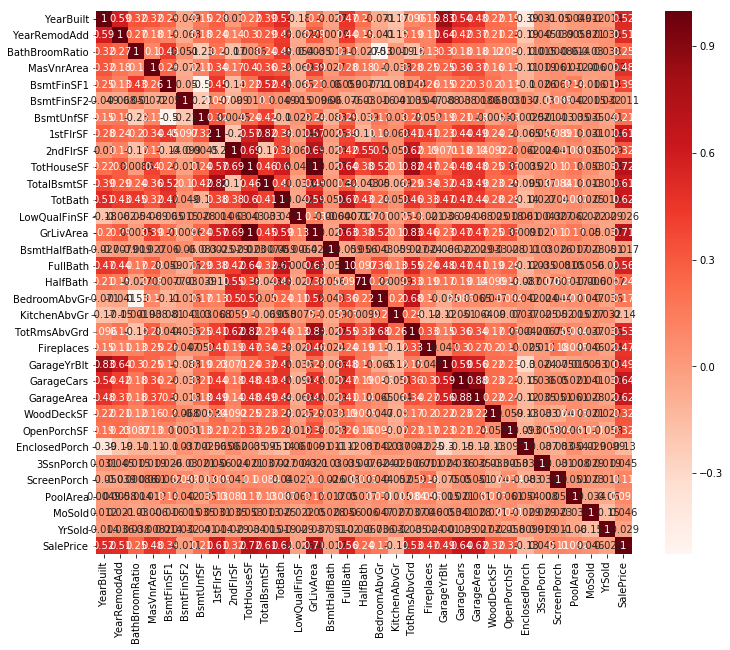

In [60]:
plt.figure(figsize=(12,10))
cor = data.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [72]:
cor_target = cor["SalePrice"]
relevant_features = cor_target[cor_target>0.5]
print(relevant_features)


YearBuilt       0.522897
YearRemodAdd    0.507101
1stFlrSF        0.605852
TotHouseSF      0.716883
TotalBsmtSF     0.613581
TotBath         0.616270
GrLivArea       0.708624
FullBath        0.560664
TotRmsAbvGrd    0.533723
GarageCars      0.640409
GarageArea      0.623431
SalePrice       1.000000
Name: SalePrice, dtype: float64


In [94]:
corr_matrix = data.corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
print(upper)

# Find features with correlation greater than 0.75
to_drop = [column for column in upper.columns if any(upper[column] > 0.75)]
print(to_drop) 

# TotalBsmtSF vs. 1stFlrSF(0.819), GRLivArea vs. TotHouseSF (0.9957), TotRmsAbvGrd vs. TotHouseSF (0.8200), 
# TotRmsAbvGrd vs. GrLivArea (0.8254), GarageYrBlt vs. YearBuilt (0.8256), GarageArea vs. GarageCars (0.8824)

                YearBuilt  YearRemodAdd  BathBroomRatio  MasVnrArea  \
YearBuilt             NaN      0.592855        0.321001    0.315707   
YearRemodAdd          NaN           NaN        0.271351    0.179618   
BathBroomRatio        NaN           NaN             NaN    0.102776   
MasVnrArea            NaN           NaN             NaN         NaN   
BsmtFinSF1            NaN           NaN             NaN         NaN   
BsmtFinSF2            NaN           NaN             NaN         NaN   
BsmtUnfSF             NaN           NaN             NaN         NaN   
1stFlrSF              NaN           NaN             NaN         NaN   
2ndFlrSF              NaN           NaN             NaN         NaN   
TotHouseSF            NaN           NaN             NaN         NaN   
TotalBsmtSF           NaN           NaN             NaN         NaN   
TotBath               NaN           NaN             NaN         NaN   
LowQualFinSF          NaN           NaN             NaN         NaN   
GrLivA